1 a，b

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
from math import log2

def entropy(y):
    counts = Counter(y)
    total = len(y)
    return -sum((count / total) * log2(count / total) for count in counts.values())

def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = sum((counts[i] / sum(counts)) * entropy(data[data[feature] == values[i]][target]) for i in range(len(values)))
    print(weighted_entropy)
    return total_entropy - weighted_entropy

data = pd.DataFrame({
    'Hair': ['blonde', 'blonde', 'brown', 'blonde', 'red', 'brown', 'brown', 'brown'],
    'Height': ['average', 'tall', 'short', 'short', 'average', 'tall', 'average', 'short'],
    'Build': ['light', 'average', 'average', 'average', 'heavy', 'heavy', 'heavy', 'light'],
    'Lotion': ['no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes'],
    'Result': ['sunburned', 'none', 'none', 'sunburned', 'sunburned', 'none', 'none', 'none']
})

# 计算数据集的熵
total_entropy = entropy(data['Result'])
print(f"Entropy of dataset: {total_entropy:.3f}")

# 计算每个特征的信息增益
features = ['Hair', 'Height', 'Build', 'Lotion']
info_gains = {feature: information_gain(data, feature, 'Result') for feature in features}

# 选择信息增益最高的特征作为根节点
best_feature = max(info_gains, key=info_gains.get)
print("Information Gain for each feature:")
for feature, gain in info_gains.items():
    print(f"{feature}: {gain:.3f}")

print(f"Best feature to split: {best_feature}")


Entropy of dataset: 0.954
0.3443609377704336
0.6887218755408672
0.9387218755408672
0.6068441215341679
Information Gain for each feature:
Hair: 0.610
Height: 0.266
Build: 0.016
Lotion: 0.348
Best feature to split: Hair


2

In [4]:
data2 = pd.DataFrame({
    'Credit History': ['bad', 'bad', 'bad', 'unknown', 'unknown', 'good', 'bad', 'unknown', 'good', 'unknown', 'unknown', 'good', 'good', 'good'],
    'Debt': ['low', 'high', 'low', 'high', 'high', 'high', 'low', 'low', 'high', 'low', 'low', 'low', 'high', 'high'],
    'Income': ['0to30', '30to60', '0to30', '30to60', '0to30', '0to30', 'over60', '30to60', '30to60', 'over60', 'over60', 'over60', 'over60', 'over60'],
    'Risk': ['high', 'high', 'high', 'high', 'high', 'high', 'medium', 'medium', 'low', 'low', 'low', 'low', 'low', 'low'],
})

total_entropy = entropy(data2['Risk'])
print(f"Entropy of dataset: {total_entropy:.3f}")

features = ['Credit History', 'Debt', 'Income']
info_gains = {feature: information_gain(data2, feature, 'Risk') for feature in features}

print(info_gains)

Entropy of dataset: 1.449
1.0331709604792967
1.2709424217485372
0.7071524664207232
{'Credit History': 0.415644675245888, 'Debt': 0.17787321397664746, 'Income': 0.7416631693044615}


choose  Income as the root of a decision tree

4

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [7]:
penguins_all = pd.read_csv('penguins_af.csv')
f_names = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']
X = penguins_all[f_names].values
y = penguins_all['species']
species_names = list(np.unique(y))
species_names

['Adelie', 'Chinstrap', 'Gentoo']

In [12]:
X.shape

(333, 4)

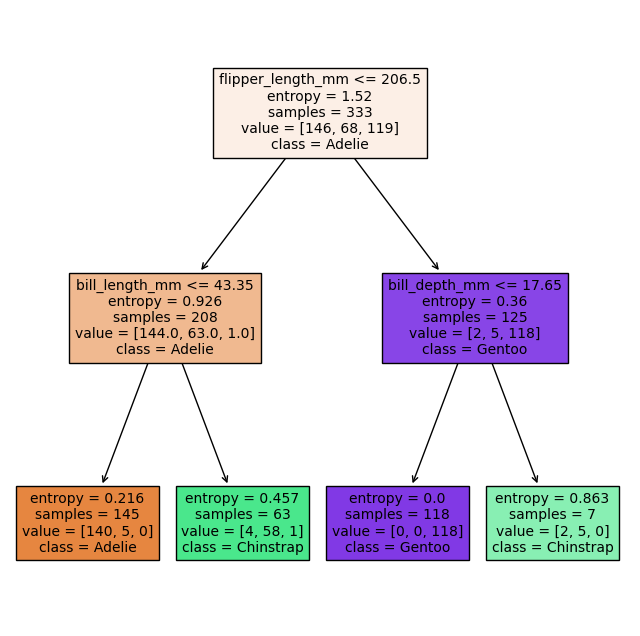

In [46]:
ptree = DecisionTreeClassifier(criterion='entropy',min_impurity_decrease = 0.1)
ptree.fit(X,y)
fig, ax = plt.subplots(figsize=(8, 8))
tree.plot_tree(ptree, feature_names=f_names, fontsize=10,
                   class_names=species_names,
                   filled=True) 
None

Bushy tree - no pruning

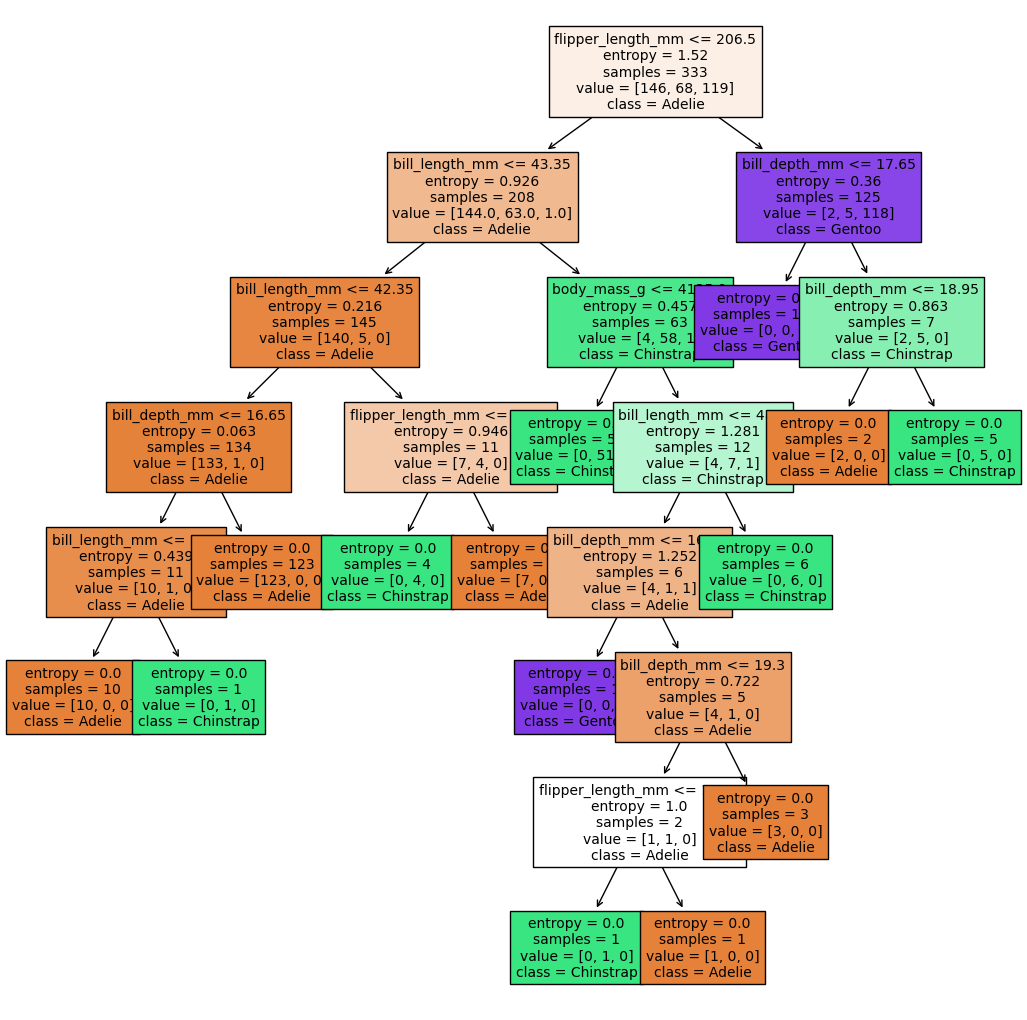

In [34]:
ptree = DecisionTreeClassifier(criterion='entropy')
ptree.fit(X,y)
fig, ax = plt.subplots(figsize=(13, 13))
tree.plot_tree(ptree, feature_names=f_names, fontsize=10,
                   class_names=species_names,
                   filled=True) 
None

In [36]:
ptree.get_n_leaves()

14

 prun the decision trees Alternative strategies

1. max_depth 
2. min_samples_leaf 
3. min_samples_split 
4. max_leaf_nodes 

max_depth

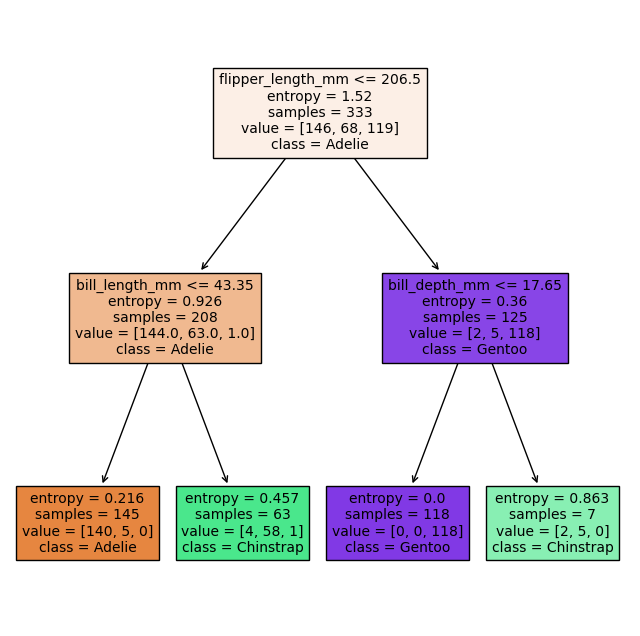

In [41]:
ptree = DecisionTreeClassifier(criterion='entropy', max_depth = 2)
ptree.fit(X,y)
fig, ax = plt.subplots(figsize=(8, 8))
tree.plot_tree(ptree, feature_names=f_names, fontsize=10,
                   class_names=species_names,
                   filled=True) 
None

max_leaf_nodes

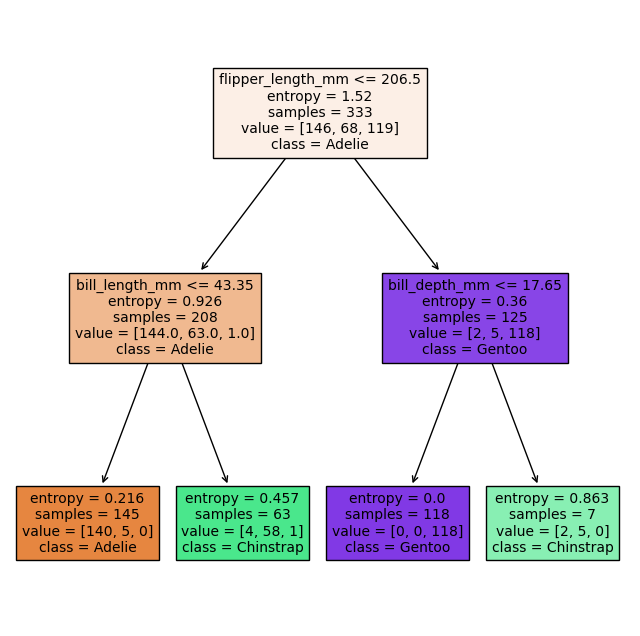

In [44]:
ptree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 4)
ptree.fit(X,y)
fig, ax = plt.subplots(figsize=(8, 8))
tree.plot_tree(ptree, feature_names=f_names, fontsize=10,
                   class_names=species_names,
                   filled=True) 
None